Russia VS UKraine War sentiment analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [28]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [29]:
df = pd.read_csv('Russia_Ukraine_War.csv')
df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.630370e+18,1.630150e+18,2023-02-28 00:36:15 UTC,2/28/2023,0:36:15,0,1.493760e+18,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1.630370e+18,1.630370e+18,2023-02-28 00:36:13 UTC,2/28/2023,0:36:13,0,1.526690e+18,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,en,[],['https://reality-choice.org/177/sura-the-russ...,[],0,0,0,[],[],https://twitter.com/paperfloure/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.630370e+18,1.630370e+18,2023-02-28 00:36:13 UTC,2/28/2023,0:36:13,0,1.053020e+18,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,[],['https://thehill.com/blogs/in-the-know/387609...,[],0,0,0,[],[],https://twitter.com/katetbar1/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  float64
 1   conversation_id  10014 non-null  float64
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  float64
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [31]:
df.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.shape

(10014, 36)

In [34]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

Let's import relevant librairies for sentiment analysis

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

We only need three columns for this task (username, tweet, and language)

In [36]:
data = df[['username', 'tweet', 'language']]
data.head()

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en


In [37]:
data['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [38]:
data.isna().sum()

username    0
tweet       0
language    0
dtype: int64

Data cleaning

In [39]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
import pandas as pd
print(pd.__version__)

2.1.4


In [47]:
import warnings



In [48]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [49]:
data["tweet"] = data["tweet"].apply(clean)

C:\Users\phili\AppData\Local\Temp\ipykernel_5552\2969208463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean)


Let's have a look at the wordcloud of the tweets 

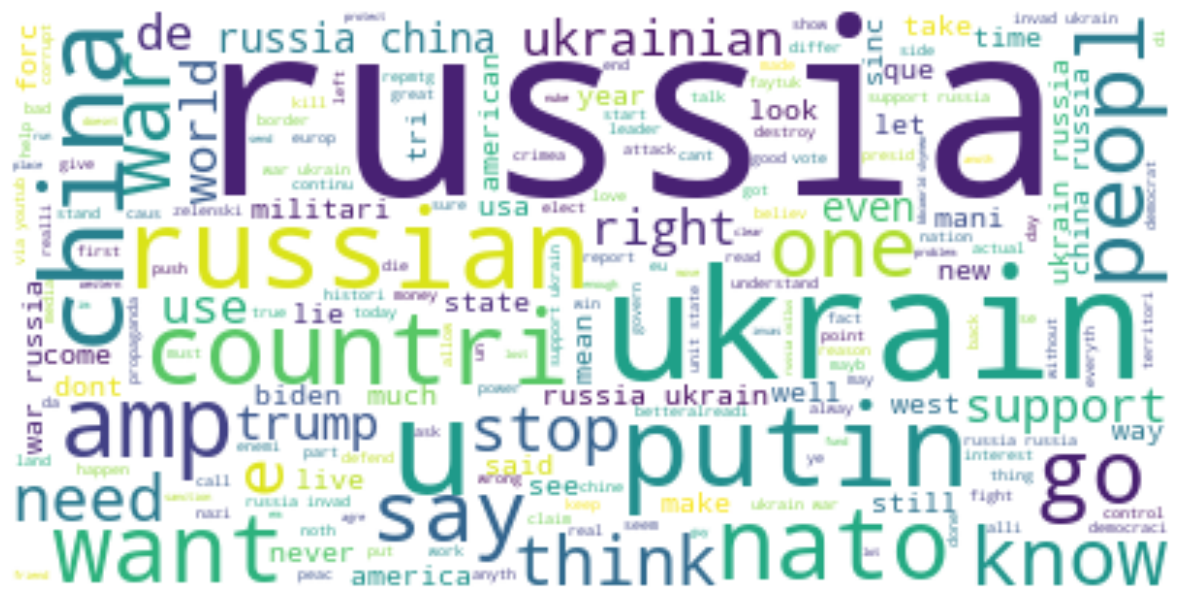

In [50]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [51]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
C:\Users\phili\AppData\Local\Temp\ipykernel_5552\551152580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
C:\Users\phili\AppData\Local\Temp\ipykernel_5552\551152580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
C:\Users\phili\AppD

In [52]:
data.head()

,tweet,Positive,Negative,Neutral
0,nazijaeg derwen russia place satan rule well,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.280,0.720
2,putin give steven seagal order friendship,0.367,0.000,0.633
3,mainelif baddcompani it alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.068,0.078,0.854


the most frequent words used by people with positive sentiments:

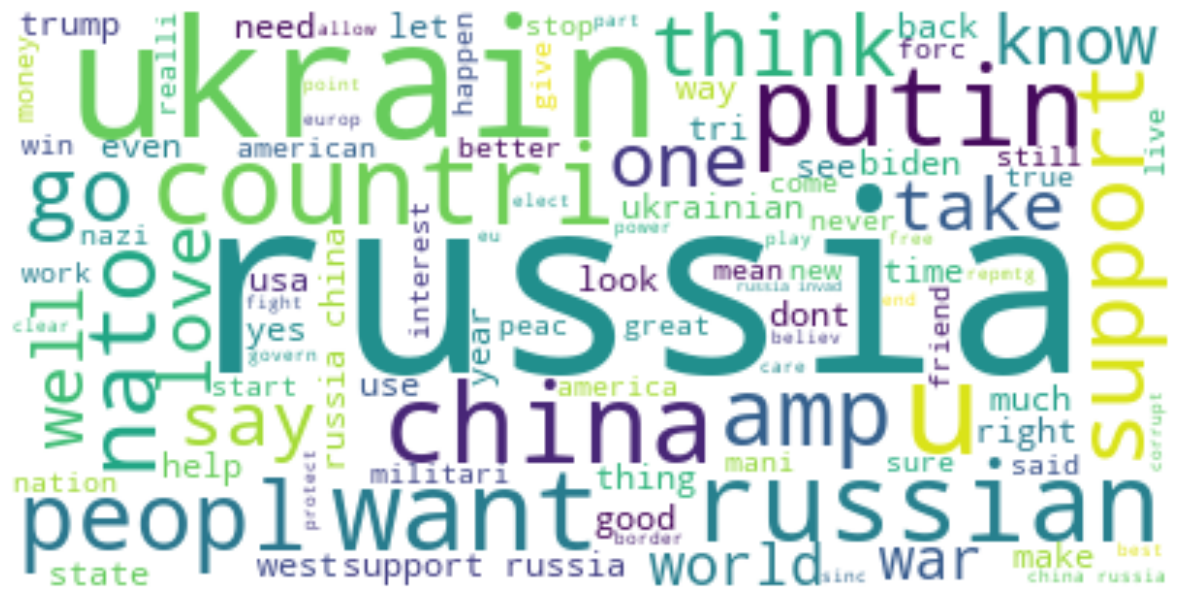

In [53]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

the most frequent words used by people with negative sentiments:

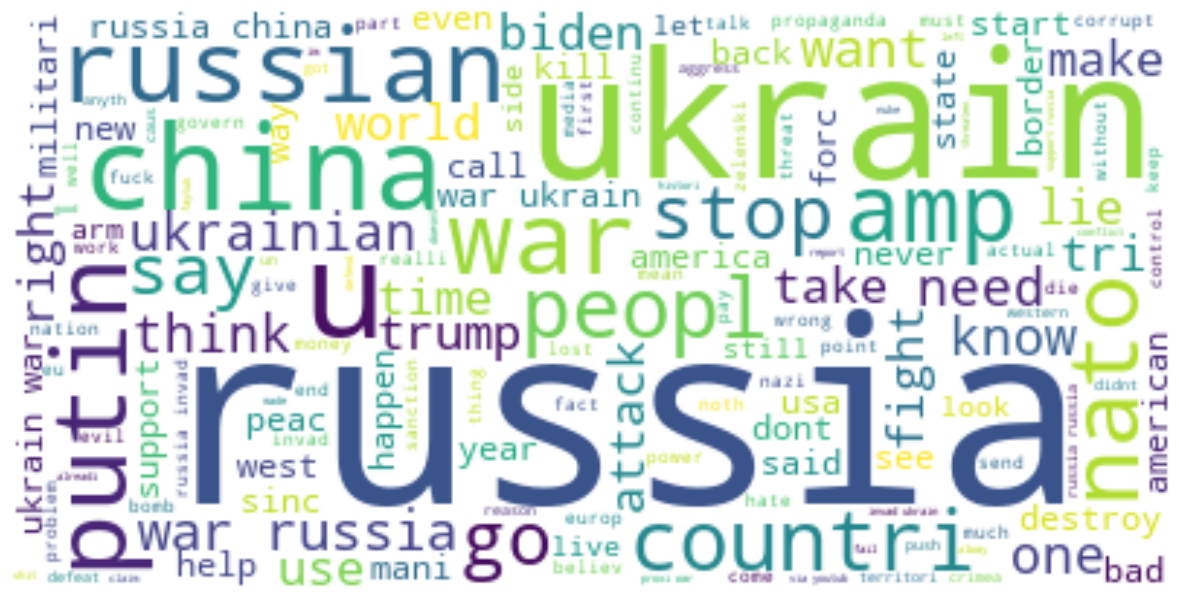

In [54]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
data2 = data.drop('tweet', axis = 1)


# Calculate the mean for each sentiment category across all tweets
mean_sentiments = data2.mean()

# Plotting the average sentiment scores
ax = mean_sentiments.plot(kind='bar', figsize=(10, 8), color=['blue', 'red', 'green'])

# Adding labels and title
plt.xlabel('Sentiment Category', size = 18)
plt.ylabel('Average Sentiment Score', size = 18)
plt.title('Average Sentiment Analysis Across Tweets', size = 20)

# Adding percentages on top of each bar
for bar in ax.patches:
    # Using text formatting to display percentage
    ax.text(
        bar.get_x() + bar.get_width() / 2 - 0.05,  # X-coordinate of text
        bar.get_height() + 0.01,  # Y-coordinate of text
        f'{bar.get_height() * 100:.2f}%',  # Text to display (percentage)
        color='black',  # Text color
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Display the plot
plt.tight_layout()
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\phili\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\phili\AppData\Local\Temp\ipykernel_5552\2172419884.py", line 8, in <module>
    ax = mean_sentiments.plot(kind='bar', figsize=(10, 8), color=['blue', 'red', 'green'])
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phili\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 951, in __call__
    )
      
  File "c:\Users\phili\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 1947, in _get_plot_backend
  File "c:\Users\phili\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 1877, in _load_backend
    ) from None
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (m